In [2]:
# ADP 21회 학생 grade 데이터 
# 시각화 포함 EDA
# 결측치 식별하고 결측치 예측하는 두가지 방법 서술 + 선택 이유 설명
# 범주형 변수 인코딩이 필요한 경우를 식별 + 변환 + 선택 이유 설명
# 데이터 분할방법 2가지 서술 + 1가지 방법으로 분할 및 선택 이유 설명
# svm, xgboost, randomforest 3개 알고리즘의 공통점 쓰고 
# 이 예측 분석에 적합한 알고리즘인지 설명
# 3개 모델 모두 모델링한 후, 가장 적합한 알고리즘 선택 + 이유 설명
# 한계점 설명하고 보완가능한 부분 설명
# 현업에서 사용시 주의점 등을 기술

In [32]:
## 데이터 출처 
## https://archive.ics.uci.edu/ml/datasets/student+performance
## adp 21회에 나온 컬럼들만 추출하여 분석에 활용
## 결측치 없어서 결측치 분석은 제외함

In [98]:
import pandas as pd

In [99]:
df = pd.read_csv('data/student-mat.csv')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [101]:
# adp 21회에는 school, sex, paid, activities, farmrel, 
# freetime, goout, dalc, walc, health, absences
# 타겟변수 grade 

ddf = df.iloc[:, [0,1,17,18,23,24,25,26,27,28,29,-1]]
ddf.describe()

,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [102]:
## 시각화 포함 EDA

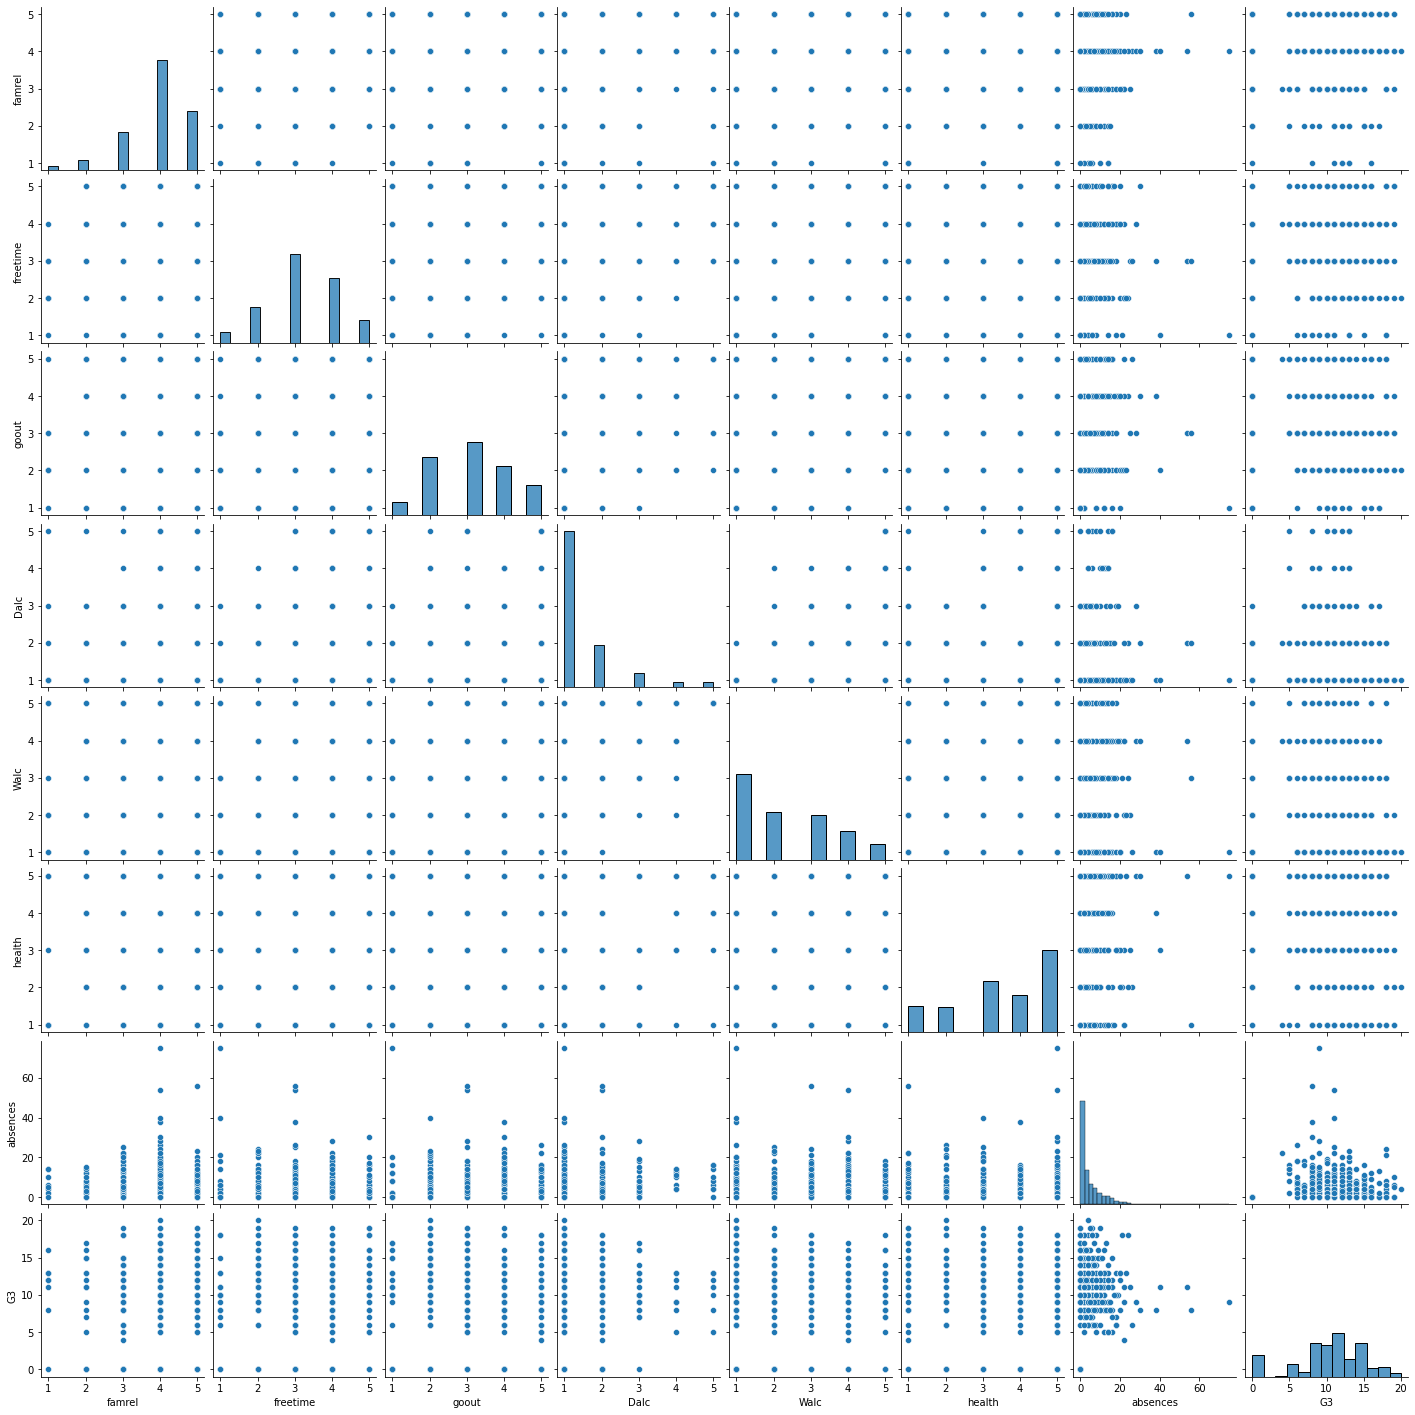

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(ddf)

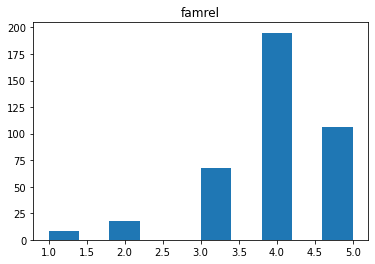

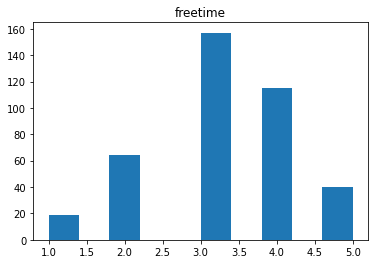

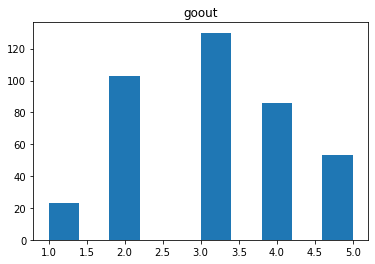

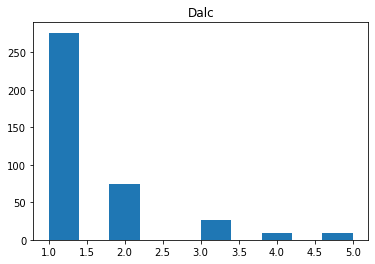

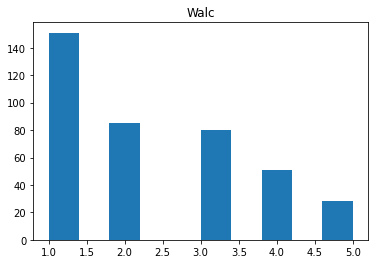

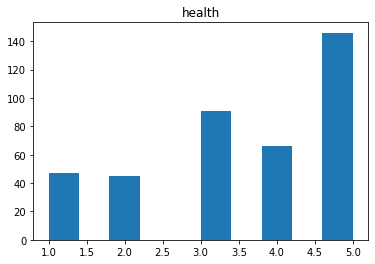

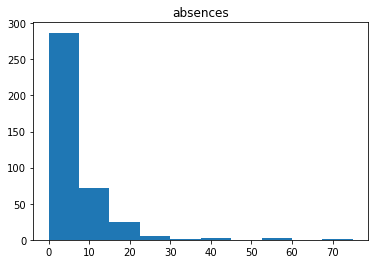

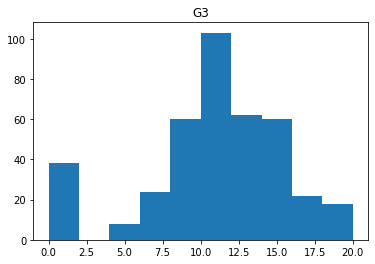

In [104]:
for v in ddf.select_dtypes(include='int'):
    target = ddf[v]
    plt.hist(target)
    plt.title(v)
    plt.show()

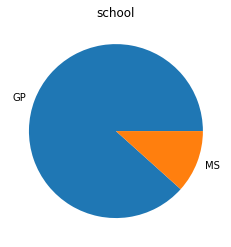

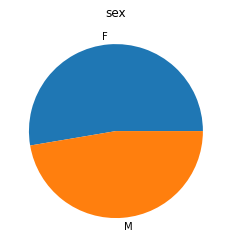

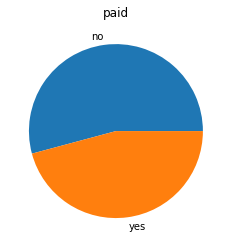

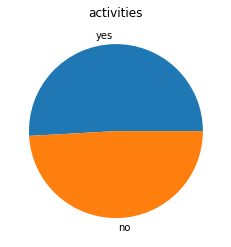

In [105]:
for v in ddf.select_dtypes(include='object'):
    target = ddf[v].value_counts()
    plt.pie(target.values, labels=target.index)
    plt.title(v)
    plt.show()

In [106]:
## 범주형 변수 인코딩이 필요한 경우 식별 및 변환. 선택한 이유 설명

### famrel
### 4.0 이 가장 많고 비대칭분포를 보임  
### -> 4.0 기준으로 위 아래로 나눔 - 보통 이하 / 좋음

### absences 대부분 0회에 속하고 있음
### -> 0 기준으로 위아래로 나눔 - 결석 있음 / 없음

### health 
### 4.0 이 가장 많고 비대칭분포를 보임
### -> 4.0 기준으로 위아래로 나눔 - 보통 이하 / 좋음


### Dalc / Walc
### 1.0 이 가장 많고 비대칭 분포를 보임
### -> 1.0 기준으로 위아래로 나눔 - ??? 이 변수가 뭔지 모르겠음

In [112]:
ddf.loc[(ddf['famrel'] >= 4.0), 'famrel_2'] = 'G' # famrel 양호
ddf.loc[(ddf['famrel'] < 4.0), 'famrel_2'] = 'NG'  # famrel 보통이하

In [113]:
ddf.loc[(ddf['absences'] == 0.0), 'absences_2'] = 'G' # 출석률 양호
ddf.loc[(ddf['absences'] >= 1.0), 'absences_2'] = 'NG'  # 1회이상 결석

In [114]:
ddf.loc[(ddf['health'] >= 4.0), 'health_2'] = 'G' # health 양호
ddf.loc[(ddf['health'] < 4.0), 'health_2'] = 'NG'  # health 보통이하

In [115]:
ddf.loc[(ddf['Dalc'] == 0.0), 'Dalc_2'] = 'G' # Dalc 0회
ddf.loc[(ddf['Dalc'] >= 1.0), 'Dalc_2'] = 'NG'  # 1회이상 Dalc

ddf.loc[(ddf['Walc'] == 0.0), 'Walc_2'] = 'G' # Walc 0회
ddf.loc[(ddf['Walc'] >= 1.0), 'Walc_2'] = 'NG'  # 1회이상 Walc

<AxesSubplot:>

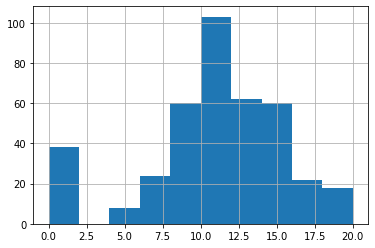

In [120]:
ddf['G3'].hist()

In [122]:
ddf.loc[(ddf['G3'] >= 10.0), 'G3_2'] = 'G' # Walc 0회
ddf.loc[(ddf['G3'] < 10.0), 'G3_2'] = 'NG'  # 1회이상 Walc

In [123]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   paid        395 non-null    object
 3   activities  395 non-null    object
 4   famrel      395 non-null    int64 
 5   freetime    395 non-null    int64 
 6   goout       395 non-null    int64 
 7   Dalc        395 non-null    int64 
 8   Walc        395 non-null    int64 
 9   health      395 non-null    int64 
 10  absences    395 non-null    int64 
 11  G3          395 non-null    int64 
 12  famrel_2    395 non-null    object
 13  absences_2  395 non-null    object
 14  health_2    395 non-null    object
 15  Dalc_2      395 non-null    object
 16  Walc_2      395 non-null    object
 17  G3_2        395 non-null    object
dtypes: int64(8), object(10)
memory usage: 55.7+ KB


In [129]:
### 범주형 변수를 더미변수로 변경
dddf = pd.get_dummies(ddf)

In [132]:
dddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   famrel          395 non-null    int64
 1   freetime        395 non-null    int64
 2   goout           395 non-null    int64
 3   Dalc            395 non-null    int64
 4   Walc            395 non-null    int64
 5   health          395 non-null    int64
 6   absences        395 non-null    int64
 7   G3              395 non-null    int64
 8   school_GP       395 non-null    uint8
 9   school_MS       395 non-null    uint8
 10  sex_F           395 non-null    uint8
 11  sex_M           395 non-null    uint8
 12  paid_no         395 non-null    uint8
 13  paid_yes        395 non-null    uint8
 14  activities_no   395 non-null    uint8
 15  activities_yes  395 non-null    uint8
 16  famrel_2_G      395 non-null    uint8
 17  famrel_2_NG     395 non-null    uint8
 18  absences_2_G    395 non-null  

In [136]:
dddf.head()

,famrel,freetime,goout,Dalc,Walc,health,absences,G3,school_GP,school_MS,...,famrel_2_G,famrel_2_NG,absences_2_G,absences_2_NG,health_2_G,health_2_NG,Dalc_2_NG,Walc_2_NG,G3_2_G,G3_2_NG
0,4,3,4,1,1,3,6,6,1,0,...,1,0,0,1,0,1,1,1,0,1
1,5,3,3,1,1,3,4,6,1,0,...,1,0,0,1,0,1,1,1,0,1
2,4,3,2,2,3,3,10,10,1,0,...,1,0,0,1,0,1,1,1,1,0
3,3,2,2,1,1,5,2,15,1,0,...,0,1,0,1,1,0,1,1,1,0
4,4,3,2,1,2,5,4,10,1,0,...,1,0,0,1,1,0,1,1,1,0


In [139]:
final_df_ = dddf.copy()
final_df = final_df_.drop(['famrel','freetime','goout','Dalc','Walc','health','absences',
                      'G3','sex_F','paid_no','activities_no','famrel_2_NG',
                      'absences_2_NG','health_2_NG','G3_2_NG'], axis=1)

In [128]:
## 데이터 분할 방법 2가지 쓰고 적절한 방법 선택 및 이유 설명

### (1) train / test split 으로 분리 
### (2) 교차검증 (KFold 또는 stratifiedKFold)
### -> (2) 교차검증 선택. 학습데이터에 과적합 되는 것을 방지하기 위함

In [140]:
final_df['G3_2_G'].value_counts()
# 성적 양호한 그룹보다 성적 안좋은 그룹의 인원이 더 적어서 
# 한쪽으로 치우쳐져 있으므로 
# stratifiedKFold 를 활용하여 교차검증

1    265
0    130
Name: G3_2_G, dtype: int64

In [143]:
X = final_df.drop(['G3_2_G'], axis=1)
y = final_df['G3_2_G']

In [144]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(X, y):
    n_iter += 1
    label_train = y.iloc[train_index]
    label_test = y.iloc[test_index]
    
    print('##### 교차 검증: {} #####'.format(n_iter))
    print('학습 레이블 데이터 분포:\n',label_train.value_counts())
    print('검증 레이블 데이터 분포:\n',label_test.value_counts(),'\n\n')
    
    
### -> 출력결과에서 학습 레이블과 검증 레이블의 각 값이 
###    동일한 분포를 갖도록 분할된것을 알수 있음

##### 교차 검증: 1 #####
학습 레이블 데이터 분포:
 1    177
0     86
Name: G3_2_G, dtype: int64
검증 레이블 데이터 분포:
 1    88
0    44
Name: G3_2_G, dtype: int64 


##### 교차 검증: 2 #####
학습 레이블 데이터 분포:
 1    176
0     87
Name: G3_2_G, dtype: int64
검증 레이블 데이터 분포:
 1    89
0    43
Name: G3_2_G, dtype: int64 


##### 교차 검증: 3 #####
학습 레이블 데이터 분포:
 1    177
0     87
Name: G3_2_G, dtype: int64
검증 레이블 데이터 분포:
 1    88
0    43
Name: G3_2_G, dtype: int64 




In [155]:
## svm, xgboost, randomforest 3개 알고리즘의 공통점 서술 
## + 이 예측분석에 적합한 알고리즘인지 설명

### 공통점
### - 분류에 사용되는 알고리즘
### - svm은 커널트릭을 사용하여 선형적 / 비선형적 공간 모두에서 잘 작용
### - xgboost와 randomforest는 스케일링을 필요로 하지 않지만 svm은 스케일링에 큰 영향을 받음
### - 3개의 모델 모두 파라미터 조절을 통해 과적합을 방지할 수 있다
### - 셋 다 분류에 활용되고 분석에 필요한 데이터는 전처리를 통해 모두 더미변수화하였으므로
###   스케일링이 별도로 필요하지 않은 데이터여서 이 예측분석에 적합하다고 볼수 있음

In [160]:
import numpy as np

from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score 
import seaborn as sns


svc = SVC(random_state=99, probability=True)
xgb = xgb.XGBClassifier(random_state=99)
rf = RandomForestClassifier(random_state=99)


from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

accuracy_svc_ = []
accuracy_rf_ = []
accuracy_xgb_ = []


# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트 추가 입력
for train_index, test_index in skf.split(X, y):
    # split()으로 반환된 인덱스를 이용, 학습용/검증용 테스트 데이터 추출
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 학습 및 에측
    svc.fit(X_train, y_train)
    pred_svc = svc.predict(X_test)
    
    xgb.fit(X_train, y_train)
    pred_xgb = xgb.predict(X_test)
        
    rf.fit(X_train, y_train)
    pred_rf = rf.predict(X_test)
    
        
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy_svc = np.round(accuracy_score(y_test, pred_svc), 4)
    accuracy_rf = np.round(accuracy_score(y_test, pred_rf), 4)
    accuracy_xgb = np.round(accuracy_score(y_test, pred_xgb), 4)
    
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{} 교차 검증 정확도(scv) :{},교차 검증 정확도(rf) :{},교차 검증 정확도(xgb) :{}, 학습 데이터 크기 :{}, 검증 데이터 크기 :{}'.format(n_iter, accuracy_svc, accuracy_rf, accuracy_xgb, train_size, test_size))
    print('#{} 검증 데이터 인덱스:{}'.format(n_iter, test_index))
    
    accuracy_svc_.append(accuracy_svc)
    accuracy_rf_.append(accuracy_rf)
    accuracy_xgb_.append(accuracy_xgb)
    

# 교차 검증별 정확도 및 평균 정확도 계산
print('SVM 결과 - 정확도')
print('\n 교차 검증별 정확도:',np.round(accuracy_svc_, 4))
print('## 평균 검증 정확도:', np.mean(accuracy_svc_))

print('rf 결과 - 정확도')
print('\n 교차 검증별 정확도:',np.round(accuracy_rf_, 4))
print('## 평균 검증 정확도:', np.mean(accuracy_rf_))

print('xgb 결과 - 정확도')
print('\n 교차 검증별 정확도:',np.round(accuracy_xgb_, 4))
print('## 평균 검증 정확도:', np.mean(accuracy_xgb_))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:41:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

#1 교차 검증 정확도(scv) :0.6364,교차 검증 정확도(rf) :0.6136,교차 검증 정확도(xgb) :0.5833, 학습 데이터 크기 :263, 검증 데이터 크기 :132
#1 검증 데이터 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 118 124 127 128 130 131 134 135 136
 137 140 141 144 146 148]


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:41:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

#2 교차 검증 정확도(scv) :0.6515,교차 검증 정확도(rf) :0.5985,교차 검증 정확도(xgb) :0.6136, 학습 데이터 크기 :263, 검증 데이터 크기 :132
#2 검증 데이터 인덱스:[117 119 120 121 122 123 125 126 129 132 133 138 139 142 143 145 147 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 260 262 265 266 267]


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

#3 교차 검증 정확도(scv) :0.6718,교차 검증 정확도(rf) :0.626,교차 검증 정확도(xgb) :0.6336, 학습 데이터 크기 :264, 검증 데이터 크기 :131
#3 검증 데이터 인덱스:[259 261 263 264 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353
 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371
 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389
 390 391 392 393 394]
SVM 결과 - 정확도

 교차 검증별 정확도: [0.6364 0.651

In [162]:
df_pred_svc = pd.DataFrame(pred_svc)
df_pred_svc.columns = ['pred_svc']

df_pred_rf = pd.DataFrame(pred_rf)
df_pred_rf.columns = ['pred_rf']

df_pred_xgb = pd.DataFrame(pred_xgb)
df_pred_xgb.columns = ['pred_xgb']

y_test_ = y_test.reset_index()
comp_df = pd.concat([y_test_, df_pred_svc, df_pred_rf, df_pred_xgb], axis=1)
comp_df

,index,G3_2_G,pred_svc,pred_rf,pred_xgb
0,259,0,1,1,1
1,261,0,1,1,1
2,263,0,1,1,1
3,264,0,1,1,1
4,268,1,1,1,1
...,...,...,...,...,...
126,390,0,1,1,1
127,391,1,1,1,1
128,392,0,1,1,1
129,393,1,1,0,0


In [165]:
# 필요한 값 만 구할 경우 
from sklearn.metrics import precision_score, recall_score, f1_score

print('\n < 정밀도 / 재현율 / f1 score - svc >')
print('precision', precision_score(comp_df['G3_2_G'],comp_df['pred_svc']))
print('recall', recall_score(comp_df['G3_2_G'],comp_df['pred_svc']))
print('f1', f1_score(comp_df['G3_2_G'],comp_df['pred_svc']))


print('\n < 정밀도 / 재현율 / f1 score - 랜덤 포레스트 >')
print('precision', precision_score(comp_df['G3_2_G'],comp_df['pred_rf']))
print('recall', recall_score(comp_df['G3_2_G'],comp_df['pred_rf']))
print('f1', f1_score(comp_df['G3_2_G'],comp_df['pred_rf']))


print('\n < 정밀도 / 재현율 / f1 score - xgb >')
print('precision', precision_score(comp_df['G3_2_G'],comp_df['pred_xgb']))
print('recall', recall_score(comp_df['G3_2_G'],comp_df['pred_xgb']))
print('f1', f1_score(comp_df['G3_2_G'],comp_df['pred_xgb']))


 < 정밀도 / 재현율 / f1 score - svc >
precision 0.6744186046511628
recall 0.9886363636363636
f1 0.8018433179723502

 < 정밀도 / 재현율 / f1 score - 랜덤 포레스트 >
precision 0.672566371681416
recall 0.8636363636363636
f1 0.7562189054726368

 < 정밀도 / 재현율 / f1 score - xgb >
precision 0.6886792452830188
recall 0.8295454545454546
f1 0.7525773195876289


In [ ]:
## 3개 모델 모두 모델링해보고 가장 적합한 알고리즘 선택 및 이유 설명
## 한계점 설명하고 보완가능한 부분 설명 + 현업에서 사용시 주의점 등 기술

### -> svm 모델의 정확도, f1 score, 재현율이 가장 높게 나타나서 
###    svm 모델이 가장 적합한 알고리즘이라고 판단됨
###    svm 은 커널트릭을 사용하여 선형적 / 비선형적 공간 모두에서 잘 작용하고 이상치에도 robust한 결과를 산출한다는 장점이 있고
###    이번 분석에 활용된 데이터가 scaling을 필요로 하지 않은 데이터였기 때문에 성능이 좋게 나왔다고 생각됨
### -> 그러나, svm은 파라미터 조절에 따른 성능 차이가 크고 
###    해석이 어렵고 복잡한 블랙박스 형태로 되어있다는 한계점이 있어서
###    개별적인 feature importance를 검토할 경우에는 랜덤포레스트나 xgb를 사용하는 게 낫다
### -> 현업에서 svm을 사용할때는 이러한 한계점을 보완하기 위해  
###    GridsearchCV를 활용하여 적절한 파라미터를 적용하거나
###    결과해석을 위해 support_vectors_ 속성을 검토하는 등의 방법을 시도해볼 수 있다